# Imports

In [1]:
import numpy as np
import scipy.stats as scs
from itertools import product
import seaborn as sns
plt = sns.mpl.pyplot

# Setup PSF model

In [83]:
width = 0.2 # deg
true_ra = 0 # deg
true_dec = 0 # deg
num = 100
# assuming euklidean space for simplicity
reco_ra = scs.norm.rvs(loc=0, scale=width, size=num)
reco_dec = scs.norm.rvs(loc=0, scale=width, size=num)
mean_ra = np.mean(reco_ra)
mean_dec = np.mean(reco_dec)

dist = np.sqrt((mean_ra - true_ra)**2 + (mean_dec - true_dec)**2)
print(dist)

0.00941408705472058


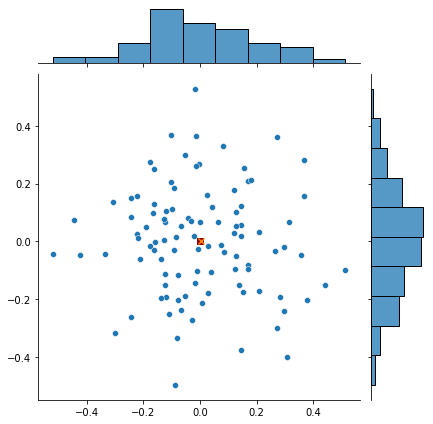

In [81]:
jg = sns.jointplot(x=reco_ra, y=reco_dec, kind="scatter")
jg.ax_joint.scatter(true_ra, true_dec, color="darkred", marker="s", label="true")
jg.ax_joint.scatter(
    np.mean(reco_ra), np.mean(reco_dec), color="tab:orange", marker="x", label="reco"
)


In [86]:
import pandas as pd

In [143]:
true_ra = 0  # deg
true_dec = 0  # deg

widths = [0.01, 0.05, 0.1, 0.15, 0.2] # deg
nums = [1, 2, 5, 7, 10, 15, 20, 50, 100]  # number of events
reps = int(1e5)
results = []
for width, num in product(widths, nums):
    # assuming euklidean space for simplicity
    reco_ra = scs.norm.rvs(loc=0, scale=width, size=(num, reps))
    reco_dec = scs.norm.rvs(loc=0, scale=width, size=(num, reps))
    mean_ra = np.mean(reco_ra, axis=0)
    mean_dec = np.mean(reco_dec, axis=0)
    dists = np.sqrt((mean_ra - true_ra) ** 2 + (mean_dec - true_dec) ** 2)
    tmp = pd.DataFrame(dists, columns=["distances"])
    tmp["width"] = width
    tmp["n_ev"] = num
    results.append(tmp)

results = pd.concat(results, ignore_index=True)


In [144]:
df = results.groupby(["width", "n_ev"], as_index=False).apply(
    lambda x: pd.Series(
        scs.rayleigh.fit(x["distances"], floc=0)[1], index=["localization"]
    )
)

df["inv_sq_n"] = 1/np.sqrt(df["n_ev"])

<AxesSubplot:xlabel='width', ylabel='localization'>

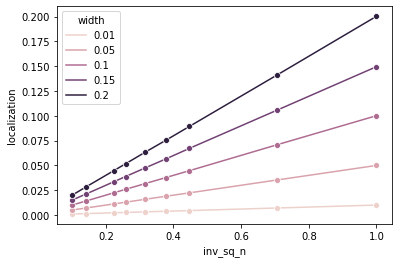

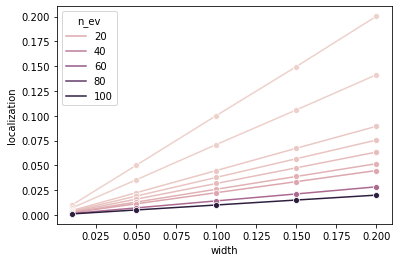

In [145]:
plt.figure()
sns.lineplot(data=df, hue="width", y="localization", x="inv_sq_n", marker="o")
plt.figure()
sns.lineplot(data=df, x="width", y="localization", hue="n_ev", marker="o")

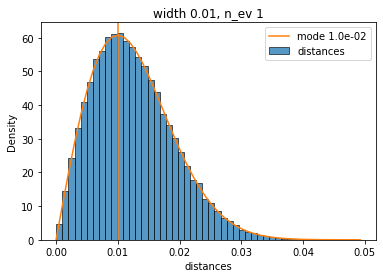

In [124]:
for (w, n), series in results.groupby(["width", "n_ev"]):
    plt.figure()
    sns.histplot(series["distances"], stat="density", bins=50, label="distances")
    fit = scs.rayleigh.fit(series["distances"], floc=0)
    xr = np.linspace(0, np.max(series["distances"]))
    plt.plot(xr, scs.rayleigh.pdf(xr, *fit), color="tab:orange")
    plt.axvline(fit[1], label=f"mode {fit[1]:1.1e}", color="tab:orange")
    plt.title(f"width {w}, n_ev {n}")
    plt.legend()
    break